# Exercise 1:
- Install & get familiar with the libraries we'll use throughout the course. Specifically:
  - gensim: run Word2Vec on "masc_corpus.csv" and apply kMeans to the embeddings to find clusters of the words that appear more than 500 times.
  - pytorch: get familiar with the library by running and following the code at https://pytorch.org/tutorials/beginner/examples_nn/polynomial_nn.html#sphx-glr-beginner-examples-nn-polynomial-nn-py
  - pyrfume: load the data and transform molecules into graphs via the mol2networx function.


## Resources

https://dylancastillo.co/nlp-snippets-cluster-documents-using-word2vec/


# Importing libraries

In [ ]:
!pip install pyrfume
!pip install pysmiles

In [ ]:
import pandas as pd
from nltk.tokenize import sent_tokenize, word_tokenize
import gensim
from gensim.models import Word2Vec
import nltk
nltk.download('punkt')
import numpy as np
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from collections import Counter
import networkx as nx
import pyrfume, pysmiles
from pyrfume import mol2networx
from pyrfume.mol2networx import smiles_to_eden
from pyrfume.mol2networx import rdkit_to_networkx
from rdkit import Chem

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


# Opening data as a dataframe

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/ADVANCED_NETWORK_SCIENCE/exercise_1/Exercise 1/masc_corpus.csv')

In [ ]:
df.head()

,it took some time and hard work but with the help of goodwill jerry was able to work out a payment plan with the prosecutors office find housing and conduct a more thorough job search
0,the above figure was given to me as my share a...
1,please l know very well that this mail might c...
2,imagine the feeling of being able to offer you...
3,i am contacting you about a need i have and i ...
4,you will not be able to send or receive new ma...


## Fixing the dataframe slightly

In [ ]:
# Create a new DataFrame with the column name as a row
new_row = pd.DataFrame({df.columns[0]: [df.columns[0]]})
# Concatenate the new row and the original DataFrame
df = pd.concat([new_row, df])
df.rename(columns={df.columns[0]: 'text'}, inplace=True)
df

,text
0,it took some time and hard work but with the h...
0,the above figure was given to me as my share a...
1,please l know very well that this mail might c...
2,imagine the feeling of being able to offer you...
3,i am contacting you about a need i have and i ...
...,...
75084,once planning and decisionmaking structures ar...
75085,to find out more about the composition of the ...
75086,gelelectrophoresis and transfer of rna to the ...
75087,a biomaterial is derived from one or more biom...


# Setting up the corpus and the tokenized words that will be the input to the model

In [ ]:
corpus = df['text'].values.tolist()
words = [word_tokenize(sentence.lower()) for sentence in corpus]

# Building the CBOW model and obtaining the word embeddings

In [ ]:
# CBOW
model1 = gensim.models.Word2Vec(words, min_count = 1,
							vector_size = 200, window = 2)

# Get the Word2Vec embeddings for your vocabulary - try to understand
word_embeddings = {word: model1.wv[word] for word in model1.wv.index_to_key}

# Visualizing some results

In [ ]:
# Print some results
print("Cosine similarity between 'more' " +
               "and 'pathways' - CBOW : ",
    model1.wv.similarity('more', 'pathways'))

Cosine similarity between 'more' and 'pathways' - CBOW :  0.33454505


In [ ]:
model1.wv.most_similar('analogous')

[('attributable', 0.9390822052955627),
 ('isolate', 0.9243940711021423),
 ('responding', 0.9183595180511475),
 ('corresponds', 0.9169553518295288),
 ('feom', 0.913084089756012),
 ('proportional', 0.9121703505516052),
 ('contributing', 0.9119324684143066),
 ('dedicated', 0.9090590476989746),
 ('belonging', 0.9087848663330078),
 ('adapted', 0.9067062139511108)]

# Selecting only words that appear more than 500 times, and obtaining their respective vectors to create a data matrix

In [ ]:
# Create a dictionary with word counts
word_counts = Counter(word for word in words for word in word)
# Select words that appear more than 500 times
selected_words = [word for word, count in word_counts.items()  if count > 500 and word in word_embeddings]
# Extract the vectors for selected words and create a data matrix
selected_vectors = [word_embeddings[word] for word in selected_words]
data_matrix = np.array(selected_vectors)

# K Means Clustering (5 clusters)

In [ ]:
# Choose the number of clusters (K)
K = 5  # You can adjust this based on your specific use case

# Apply K-Means clustering
kmeans = KMeans(n_clusters=K, random_state=0)
clusters = kmeans.fit_predict(data_matrix)

# Print the clusters
#for word, cluster in zip(word_embeddings.keys(), clusters):
    #print(f"Word: {word}, Cluster: {cluster}")

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


# PCA Dimensionality Reduction

In [ ]:
# Apply PCA to reduce dimensionality to 2D for visualization
# Rememeber, the input to pca should be a data matrix (ndarray in this case)
pca = PCA(n_components=2)
pca_result = pca.fit_transform(data_matrix)

# Visualization

In [ ]:
# complete

# Pyrfume data

In [ ]:
burton_molecules = pyrfume.load_data("burton_2022/molecules.csv")
burton_molecules.head()

,MolecularWeight,IsomericSMILES,IUPACName,name
CID,,,,
240,106.12,C1=CC=C(C=C1)C=O,benzaldehyde,benzaldehyde
261,72.11,CCCC=O,butanal,butyraldehyde
264,88.11,CCCC(=O)O,butanoic acid,butyric acid
273,102.18,C(CCN)CCN,"pentane-1,5-diamine",cadaverine
323,146.14,C1=CC=C2C(=C1)C=CC(=O)O2,chromen-2-one,coumarin


In [ ]:
print(burton_molecules.shape)

(186, 4)


In [ ]:
# to visualize molecules: df -> list of strings -> molecules -> networkx
smiles = burton_molecules["IsomericSMILES"].tolist() # list of strings

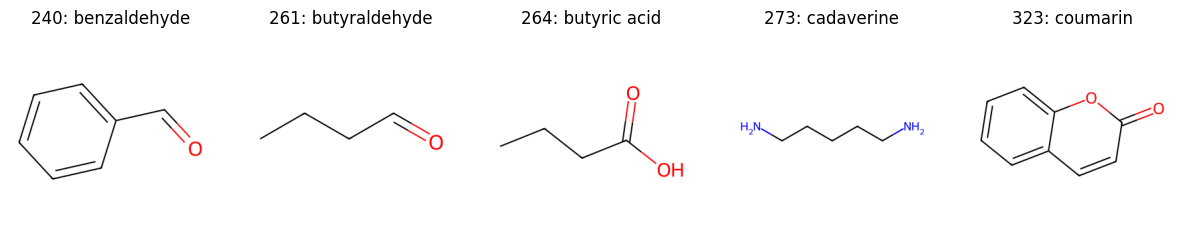

In [ ]:
from pyrfume.odorants import display_molecules
molecules_image = display_molecules(burton_molecules[0:5])

In [ ]:
list_molecules = [Chem.MolFromSmiles(smile_i) for smile_i in smiles]
list_networks = [rdkit_to_networkx(molecule_i) for molecule_i in list_molecules]

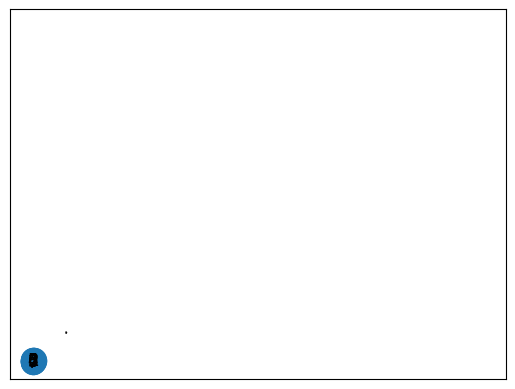

In [ ]:
# Create a NetworkX graph
F = list_networks[0]
# Define a layout for node positions (e.g., circular layout)
pos = nx.kamada_kawai_layout(F)
nx.draw_networkx(F, pos=pos)

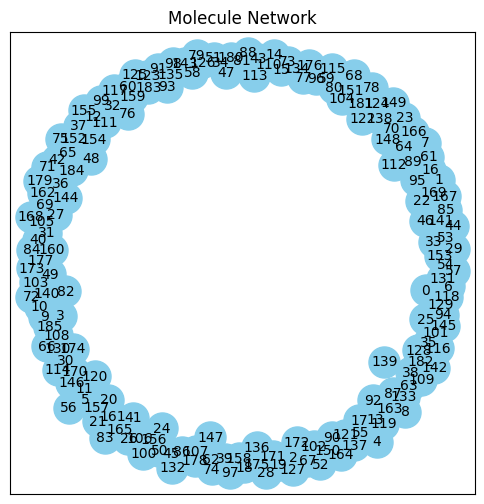

In [ ]:
# Create a NetworkX graph
G = nx.Graph()

# Add nodes representing each molecule
for idx, molecule in enumerate(list_networks):
    G.add_node(idx, molecule=molecule)

# Define a layout for node positions (e.g., circular layout)
pos = nx.fruchterman_reingold_layout(G)

# Visualize the graph
plt.figure(figsize=(6, 6))
nx.draw_networkx(G, pos, with_labels=True, node_size=500, node_color='skyblue', font_size=10)
plt.title("Molecule Network")
plt.show()